# Artificial Neural Networks using Keras

In [2]:
# import basic modules
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt


## The Perceptron
- Mimic the biological Neuron to do intelligent taks!

In [3]:
# import necessary modules, load iris data, define a perceptron, train it, and make predictions  
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [4]:
# print the output
y_pred

array([ True, False])

**Note:** The `Perceptron` becomes a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1.

In [5]:
# Build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None, learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', penalty=None,
              random_state=42)

**Note:** When the Perceptron finds a decision boundary that properly separates the classes, it stops learning, means that the decision boundary is often quite close to one class.

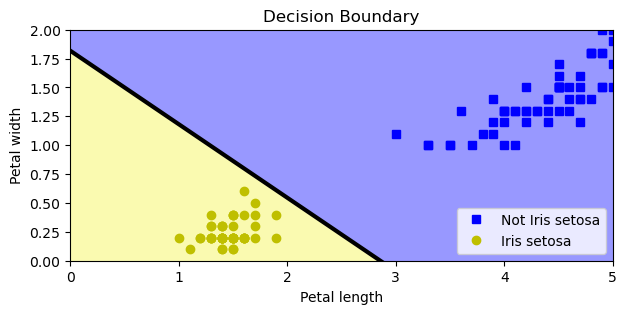

In [6]:
# plots the decision boundary of a Perceptron on the iris dataset

from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.title("Decision Boundary")
plt.show()

### Activation functions
- Non-linear functions responsible to convert non-linearly seperable data linearly seperable

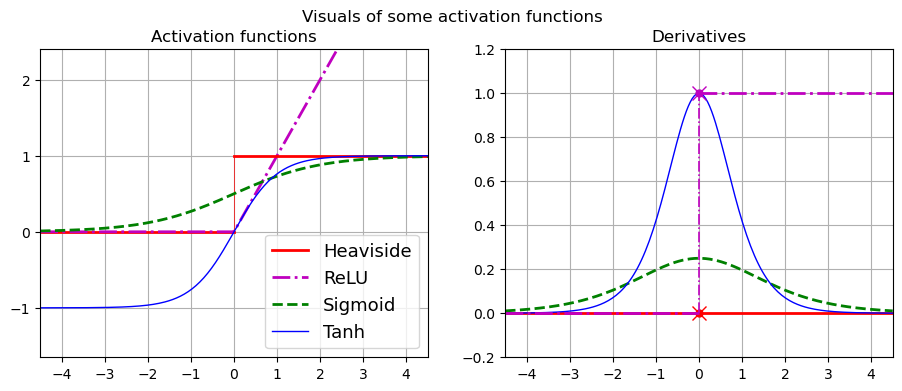

In [7]:
# visuals of some activation functions, and their derivatives

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])
plt.suptitle("Visuals of some activation functions")
plt.show()


## Regression MLPs

### Overview
- MLPs (Multilayer Perceptrons) can be used for regression tasks.
- For single value prediction (e.g., house price), one output neuron is required.
- For multivariate regression (e.g., predicting multiple values like 2D coordinates), one output neuron per dimension is needed.
- Example: Predicting the center of an object in an image (2 neurons for 2D coordinates) and bounding box (2 neurons for width and height) results in 4 output neurons.

### Example: MLPRegressor in Scikit-Learn
- **MLPRegressor** class can be used to build an MLP with multiple hidden layers.
- Example configuration:
  - 3 hidden layers with 50 neurons each.
  - Trained on the **California housing dataset** using `fetch_california_housing()`.
  - Standardization of input features is critical for gradient descent to work effectively.
- The model uses:
  - **ReLU activation** in hidden layers.
  - **Adam optimizer** to minimize the mean squared error (MSE).
  - **ℓ2 regularization**, controlled by the `alpha` hyperparameter.

### Evaluation
- The model achieves a validation **RMSE** of about **0.505**, comparable to a random forest classifier.

### Output Layer Activation Functions
- No activation function is used in the output layer (allows any value output).
- For positive-only outputs, use:
  - **ReLU** or **softplus** (a smooth variant of ReLU).
- For bounded outputs, use:
  - **Sigmoid** (range 0 to 1) or **tanh** (range –1 to 1).
- Note: **MLPRegressor** does not support activation functions in the output layer.

### Limitations and Alternatives
- **MLPRegressor** is convenient but has limited features.
- For more complex needs, switching to **Keras** is recommended.
  
### Loss Functions
- **MSE** (Mean Squared Error) is typically used for regression.
- Alternatives:
  - **Mean Absolute Error** (for datasets with many outliers).
  - **Huber loss**: A mix of MSE and MAE, less sensitive to outliers but allows faster convergence.

### Typical MLP Regression Architecture

| Hyperparameter         | Typical Value                                              |
|------------------------|------------------------------------------------------------|
| # hidden layers         | 1 to 5                                                     |
| # neurons per layer     | 10 to 100                                                  |
| # output neurons        | 1 per prediction dimension                                 |
| Hidden activation       | ReLU                                                       |
| Output activation       | None (or ReLU/softplus for positive outputs, sigmoid/tanh for bounded outputs) |
| Loss function           | MSE (or Huber for outliers)                                |


In [8]:
# generating a MLP regression model, import data, train the model, make predictions, calculate error

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [9]:
print("The root mean squared error is:", rmse)

The root mean squared error is: 0.5053326657968733


## Classification MLPs
- Responsible for classification tasks!

In [10]:
# loading data and modules, define model, train the model, and calculate accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
print("The accuracy rate is:", accuracy)

The accuracy rate is: 1.0


# Implementing MLPs with Keras
- Keras is TensorFlow’s high-level deep learning API: it allows to build, train, evaluate, and execute all sorts of neural networks

## Building an Image Classifier Using the Sequential API
- Using Keras to load the dataset

**Tasks:** start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`.

In [11]:
# import module, making trin, test, and validation set

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

**Note:** Training set contains 60,000 grayscale images, each 28x28 pixels.

In [12]:
# training data shape
X_train.shape

(55000, 28, 28)

**Note:** Each pixel intensity is represented as a byte (0 to 255).

In [13]:
# data type
X_train.dtype

dtype('uint8')

**Task:** scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing with 255.

In [14]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

**Task:** plot an image using Matplotlib's `imshow()` function, with a `'binary'`color map.

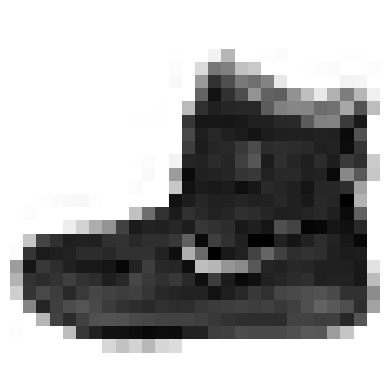

In [15]:
# ploting an image

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

**Note:** The labels are the class IDs (represented as uint8), from 0 to 9.

In [16]:
# labels
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [18]:
class_names[y_train[0]]

'Ankle boot'

**Tasks:** take a look at a sample of the images in the dataset.

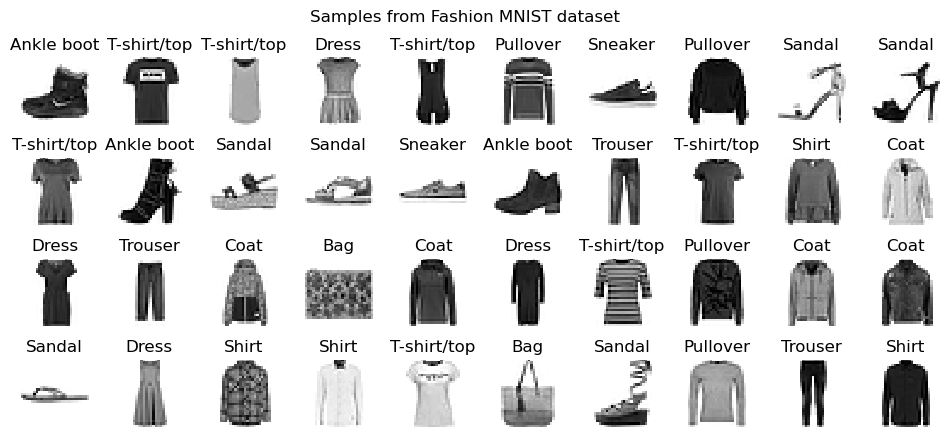

In [19]:
# Samples from Fashion MNIST

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle("Samples from Fashion MNIST dataset")
plt.show()

### Creating the model using the Sequential API
- Classification MLP with two hidden layers

In [20]:
# define a dense model

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
# clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
# model details including layer, names
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# display the model's architecture
#tf.keras.utils.plot_model(model, "model_structure.png", show_shapes=True)

In [25]:
model.layers

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0250321 ,  0.06767368,  0.05817093, ..., -0.00715683,
         0.0336361 , -0.06872563],
       [ 0.03652066, -0.04497326,  0.06985351, ..., -0.03861314,
        -0.03005286,  0.01236513],
       [-0.02709601, -0.03257921,  0.05013127, ..., -0.03883673,
         0.04798382,  0.00373451],
       ...,
       [ 0.02795209, -0.03176291,  0.05850177, ...,  0.01491569,
        -0.05333498,  0.01443973],
       [ 0.06410894,  0.03635462, -0.05040351, ..., -0.05248003,
        -0.0276589 , -0.00961443],
       [ 0.0094254 ,  0.0141554 ,  0.03010052, ...,  0.04242547,
        -0.06510253,  0.03365213]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

### Compiling the model

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [33]:
# this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [34]:
# how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Note:** it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [35]:
# how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

### Training and evaluating the model

In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7097 - sparse_categorical_accuracy: 0.7665 - val_loss: 0.5042 - val_sparse_categorical_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4856 - sparse_categorical_accuracy: 0.8314 - val_loss: 0.4638 - val_sparse_categorical_accuracy: 0.8308
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3955 - val_sparse_categorical_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3946 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3928 - val_sparse_categorical_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3789 - spars

In [37]:
# important model parameters
history.params 

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


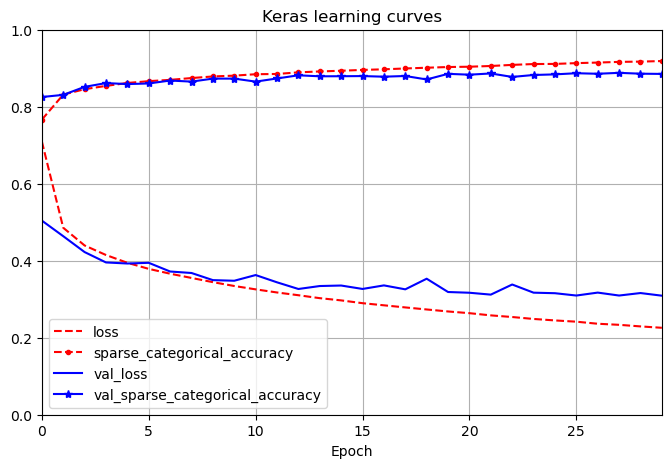

In [40]:
"""Learning curves: the mean training loss 
   and accuracy measured over each epoch, 
   and the mean validation loss and accuracy 
   measured at the end of each epoch.
"""

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.title("Keras learning curves")
plt.show()

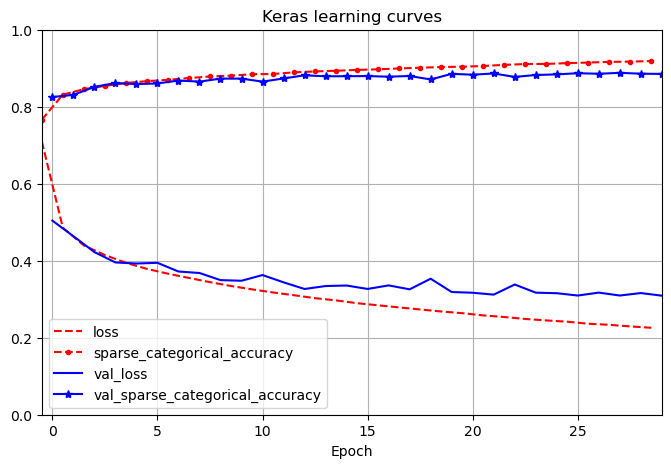

In [41]:
# shift the training curve by -1/2 epoch

plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.title("Keras learning curves")
plt.show()

In [42]:
# evaluating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3288 - sparse_categorical_accuracy: 0.8829


[0.3287678360939026, 0.8828999996185303]

### Using the model to make predictions

In [43]:
# predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 122ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

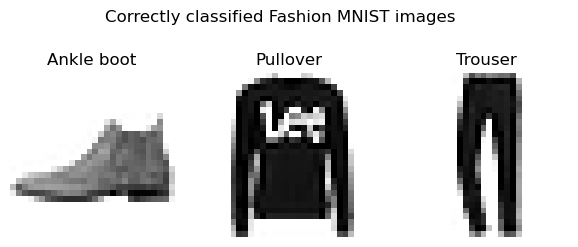

In [51]:
# Correctly classified Fashion MNIST images

plt.figure(figsize=(7.2, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle("Correctly classified Fashion MNIST images")
plt.show()

## Building a Regression MLP Using the Sequential API
- California housing problem and tackle it using the same MLP as earlier, with 3 hidden layers composed of 50 neurons each, with keras

In [52]:
# load and split the California housing dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [53]:
# define, train, and evaluate a Regression MLP model
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8589 - root_mean_squared_error: 0.9268 - val_loss: 0.5845 - val_root_mean_squared_error: 0.7645
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3842 - root_mean_squared_error: 0.6198 - val_loss: 0.5467 - val_root_mean_squared_error: 0.7394
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3486 - root_mean_squared_error: 0.5904 - val_loss: 0.4911 - val_root_mean_squared_error: 0.7008
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3370 - root_mean_squared_error: 0.5805 - val_loss: 0.5647 - val_root_mean_squared_error: 0.7515
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3233 - root_mean_squared_error: 0.5686 - val_loss: 0.3339 - val_root_mean_squared_error: 0.5778
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3132 - root_mean_squared_error: 0.5597 - val_loss: 1.3126 - val_

In [54]:
print("The root mean squared error is:", rmse_test)

The root mean squared error is: 0.5364052653312683


In [55]:
y_pred

array([[0.4474257],
       [1.1791813],
       [5.129747 ]], dtype=float32)

## Building Complex Models Using the Functional API
Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs.

In [56]:
# reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [57]:
# define the model

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [59]:
# set a training method, train and evaluate the model, make predictions

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.3659 - root_mean_squared_error: 1.1687 - val_loss: 5.5560 - val_root_mean_squared_error: 2.3571
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4721 - root_mean_squared_error: 0.6871 - val_loss: 2.5158 - val_root_mean_squared_error: 1.5861
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4052 - root_mean_squared_error: 0.6366 - val_loss: 1.1662 - val_root_mean_squared_error: 1.0799
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3785 - root_mean_squared_error: 0.6152 - val_loss: 0.5876 - val_root_mean_squared_error: 0.7665
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3636 - root_mean_squared_error: 0.6030 - val_loss: 0.4308 - val_root_mean_squared_error: 0.6564
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3530 - root_mean_squared_error: 0.5941 - val_loss: 0.4802 - val_

**Task:** Send different subsets of input features through the wide or deep paths! Sending 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [60]:
tf.random.set_seed(42)

In [61]:
# sending features to different paths

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [62]:
# set a training method, prepare data, train and evaluate the model, make predictions
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.5478 - root_mean_squared_error: 1.2441 - val_loss: 3.4168 - val_root_mean_squared_error: 1.8484
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5311 - root_mean_squared_error: 0.7287 - val_loss: 1.7031 - val_root_mean_squared_error: 1.3050
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4440 - root_mean_squared_error: 0.6663 - val_loss: 0.6298 - val_root_mean_squared_error: 0.7936
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4129 - root_mean_squared_error: 0.6426 - val_loss: 0.3805 - val_root_mean_squared_error: 0.6169
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3932 - root_mean_squared_error: 0.6271 - val_loss: 0.3570 - val_root_mean_squared_error: 0.5975
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3822 - root_mean_squared_error: 0.6182 - val_loss: 0.3781 - val_

Adding an auxiliary output for regularization:

In [63]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [64]:
# regularizations

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [65]:
# setting optimizer, and error functions
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [66]:
# setting feature to layers, train the model
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.5685 - dense_2_loss: 1.4530 - dense_3_loss: 2.6081 - dense_2_root_mean_squared_error: 1.2054 - dense_3_root_mean_squared_error: 1.6150 - val_loss: 1.3699 - val_dense_2_loss: 0.6457 - val_dense_3_loss: 7.8874 - val_dense_2_root_mean_squared_error: 0.8036 - val_dense_3_root_mean_squared_error: 2.8085
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6061 - dense_2_loss: 0.5657 - dense_3_loss: 0.9700 - dense_2_root_mean_squared_error: 0.7521 - dense_3_root_mean_squared_error: 0.9849 - val_loss: 1.6646 - val_dense_2_loss: 1.3983 - val_dense_3_loss: 4.0614 - val_dense_2_root_mean_squared_error: 1.1825 - val_dense_3_root_mean_squared_error: 2.0153
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5153 - dense_2_loss: 0.4939 - dense_3_loss: 0.7080 - dense_2_root_mean_squared_error: 0.7028 - dense_3_root_mean_squared_error: 0.8414 - val_loss: 0.5410 - val_dense_2_loss

In [67]:
# evaluate the model
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 3ms/step - loss: 0.3408 - dense_2_loss: 0.3346 - dense_3_loss: 0.3963 - dense_2_root_mean_squared_error: 0.5784 - dense_3_root_mean_squared_error: 0.6295


In [68]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 119ms/step


In [69]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 28ms/step



## Subclassing API for Dynamic Models
- The **Subclassing API** provides a more **imperative** programming style.
- Suitable for models that require dynamic behavior or more flexible code.

In [70]:
# define model

class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [71]:
# set optimizer, train and evaluate the model, make predictions
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.3693 - output_1_loss: 1.3111 - output_2_loss: 1.8930 - output_1_root_mean_squared_error: 1.1450 - output_2_root_mean_squared_error: 1.3759 - val_loss: 2.6440 - val_output_1_loss: 2.2312 - val_output_2_loss: 6.3589 - val_output_1_root_mean_squared_error: 1.4937 - val_output_2_root_mean_squared_error: 2.5217
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5115 - output_1_loss: 0.4748 - output_2_loss: 0.8416 - output_1_root_mean_squared_error: 0.6891 - output_2_root_mean_squared_error: 0.9174 - val_loss: 0.8765 - val_output_1_loss: 0.7033 - val_output_2_loss: 2.4354 - val_output_1_root_mean_squared_error: 0.8386 - val_output_2_root_mean_squared_error: 1.5606
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4497 - output_1_loss: 0.4279 - output_2_loss: 0.6455 - output_1_root_mean_squared_error: 0.6542 - output_2_root_mean_squared_error: 0.8034 - val_loss: 0.524

## Saving and Restoring a Model

In [72]:
# delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [73]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [77]:
# contents of the my_keras_model/ directory
from pathlib import Path
for items in sorted(Path("my_keras_model").glob("**/*")):
    print(items)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [79]:
# loading the saved model
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 89ms/step


In [80]:
model.save_weights("my_weights")

In [81]:
model.load_weights("my_weights")

In [82]:
# list of my_weights.* files

for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks
Specify a list of objects that Keras will call before and after training, before and after each epoch, and even before and after processing each batch.

- only save model when models performance on the validation set 

In [83]:
shutil.rmtree("my_checkpoints", ignore_errors=True)

In [85]:
# loading the already defined model, and trained it, and save best model on validation set
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3373 - output_1_loss: 0.3309 - output_2_loss: 0.3948 - output_1_root_mean_squared_error: 0.5752 - output_2_root_mean_squared_error: 0.6283 - val_loss: 0.7138 - val_output_1_loss: 0.7462 - val_output_2_loss: 0.4216 - val_output_1_root_mean_squared_error: 0.8638 - val_output_2_root_mean_squared_error: 0.6493
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3403 - output_1_loss: 0.3342 - output_2_loss: 0.3952 - output_1_root_mean_squared_error: 0.5781 - output_2_root_mean_squared_error: 0.6286 - val_loss: 1.3857 - val_output_1_loss: 1.3454 - val_output_2_loss: 1.7479 - val_output_1_root_mean_squared_error: 1.1599 - val_output_2_root_mean_squared_error: 1.3221
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3411 - output_1_loss: 0.3345 - output_2_loss: 0.4002 - output_1_root_mean_squared_error: 0.5784 - output_2_root_mean_squared_error: 0.6326 - val_loss: 0.684

In [86]:
# another way to save best model on validation set
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3235 - output_1_loss: 0.3179 - output_2_loss: 0.3731 - output_1_root_mean_squared_error: 0.5639 - output_2_root_mean_squared_error: 0.6108 - val_loss: 0.8533 - val_output_1_loss: 0.8930 - val_output_2_loss: 0.4964 - val_output_1_root_mean_squared_error: 0.9450 - val_output_2_root_mean_squared_error: 0.7046
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3243 - output_1_loss: 0.3190 - output_2_loss: 0.3721 - output_1_root_mean_squared_error: 0.5648 - output_2_root_mean_squared_error: 0.6100 - val_loss: 1.0321 - val_output_1_loss: 0.9763 - val_output_2_loss: 1.5339 - val_output_1_root_mean_squared_error: 0.9881 - val_output_2_root_mean_squared_error: 1.2385
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3238 - output_1_loss: 0.3180 - output_2_loss: 0.3753 - output_1_root_mean_squared_error: 0.5639 - output_2_root_mean_squared_error: 0.6126 - val_loss: 0.

In [88]:
# defining own custom callbacks for extra control
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [89]:
# using own custom callbacks
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=0.96
Epoch=1, val/train=1.53
Epoch=2, val/train=1.35
Epoch=3, val/train=1.33
Epoch=4, val/train=3.38
Epoch=5, val/train=3.39
Epoch=6, val/train=1.59
Epoch=7, val/train=1.57
Epoch=8, val/train=0.98
Epoch=9, val/train=1.28


## Using TensorBoard for Visualization
- View the learning curves during training

Install `tensorboard-plugin-profile`:

In [91]:
# installing
import sys
if "google.colab" in sys.modules:
    %pip install -q -U tensorboard-plugin-profile

In [92]:
shutil.rmtree("my_logs", ignore_errors=True)

In [93]:
"""definefunction that generates the path of the log subdirectory based on the current date and time, 
   so that it’s different at every run.
"""

from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [94]:
# builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [95]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2024-09-12 01:06:47.925872: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-09-12 01:06:47.925901: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-09-12 01:06:47.926071: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


162/363 [============>.................] - ETA: 0s - loss: 3.9912 - root_mean_squared_error: 1.9978

2024-09-12 01:06:48.871127: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-09-12 01:06:48.871158: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


236/363 [==================>...........] - ETA: 0s - loss: 3.2083 - root_mean_squared_error: 1.7912

2024-09-12 01:06:49.227185: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-09-12 01:06:49.271314: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


363/363 [==============================] - 2s 4ms/step - loss: 2.4883 - root_mean_squared_error: 1.5774 - val_loss: 1.0268 - val_root_mean_squared_error: 1.0133
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8302 - root_mean_squared_error: 0.9111 - val_loss: 0.7166 - val_root_mean_squared_error: 0.8465
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6801 - root_mean_squared_error: 0.8247 - val_loss: 0.6118 - val_root_mean_squared_error: 0.7822
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6199 - root_mean_squared_error: 0.7873 - val_loss: 0.5824 - val_root_mean_squared_error: 0.7631
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5781 - root_mean_squared_error: 0.7603 - val_loss: 0.5474 - val_root_mean_squared_error: 0.7398
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5425 - root_mean_squared_error: 0.7366 - val_loss: 0.5031 - val_root_mean_s

In [96]:
# details metadata, files
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_09_12_01_06_05
    plugins
      profile
        2024_09_12_01_06_49
          Users-MacBook-Air.local.xplane.pb
    train
      events.out.tfevents.1726096007.Users-MacBook-Air.local.3124.0.v2
    validation
      events.out.tfevents.1726096009.Users-MacBook-Air.local.3124.1.v2


**Task:** `tensorboard` Jupyter extension and start the TensorBoard server

In [97]:
# Visualizing learning curves with TensorBoard
%load_ext tensorboard
%tensorboard --logdir=./my_logs

**Note**: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [100]:
# display in seperate tab

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

**Note:** visualize histograms, images, text, and even listen to audio using TensorBoard

In [99]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

Stopping this Jupyter kernel will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID.

In [101]:
# lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:05:44 ago; pid 5058)


**Note:** Use the following command on Linux or MacOSX, replacing `<pid>` with the pid listed above:

    !kill <pid>

On Windows:

    !taskkill /F /PID <pid>

## Fine-Tuning Neural Network Hyperparameters
- Using the Fashion MNIST dataset to demonstate different effect of hyperparameters on the model

In [102]:
# preparing the data

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [103]:
# clear previous session and reproducibility
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [105]:
# installing if needed
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

In [109]:
# importing tuner and define model
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [110]:
# best tuner (hyperparameter)
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 14s]
val_accuracy: 0.8371999859809875

Best val_accuracy So Far: 0.8637999892234802
Total elapsed time: 00h 05m 31s


In [111]:
# top models
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [112]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [114]:
# best trial
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8637999892234802


In [115]:
# best trial accuracy
best_trial.metrics.get_last_value("val_accuracy")

0.8637999892234802

In [116]:
# training best model with full training dataset

best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3344 - accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3256 - accuracy: 0.8791
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3161 - accuracy: 0.8827
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3088 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3022 - accuracy: 0.8871
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2951 - accuracy: 0.8901
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2895 - accuracy: 0.8921
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8946
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2778 - accuracy: 0.8968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.404

In [117]:
"""builds the same model as before, with the same hyperparameters, 
   but it also uses a Boolean normalize" hyperparameter to control
   whether or not to standardize the training data before fitting the model
"""

class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [118]:
# pass a tuner, instead of build_model function

hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [119]:
# take care of using a different subdirectory for each trial
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 16 Complete [00h 00m 42s]
val_accuracy: 0.8367999792098999

Best val_accuracy So Far: 0.8416000008583069
Total elapsed time: 00h 05m 26s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
7                 |7                 |n_hidden
100               |100               |n_neurons
0.0012483         |0.0012483         |learning_rate
sgd               |sgd               |optimizer
False             |False             |normalize
10                |4                 |tuner/epochs
4                 |2                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |1                 |tuner/round
0012              |0001              |tuner/trial_id

Epoch 5/10
 627/1719 [=========>....................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8600

KeyboardInterrupt: 

In [121]:
"""
This algorithm gradually learns which regions of the hyperparameter space are most promising by fitting
a probabilistic model called a Gaussian process.
"""
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=4,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.8172000050544739

Best val_accuracy So Far: 0.8468000292778015
Total elapsed time: 00h 04m 46s


In [122]:
%tensorboard --logdir {root_logdir}

**Note:** That was the full main concepts which can be used in many domains! Thank You!